In [1]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# Read CSV file
df = pd.read_csv('/datc/parcel/notebooks/data/postnl/20200904_sample.csv', index_col=0, parse_dates=[1])

# Manipulate data
df['jaar'] = df['procesdag'].dt.year
new_df = df.groupby([df['cust_id'], df['jaar']]).agg(
    totaal_aantal_pakketten = ('aantal_pakketten', 'sum'),
    totaal_aantal_pakketten_volgende_dag = ('aantal_pakketten_volgende_dag', 'sum')
).reset_index()

In [2]:
df


,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,jaar
0,2015-01-02,klant_1,8421,0,2015
1,2015-01-02,klant_2,4547,0,2015
2,2015-01-02,klant_3,13,0,2015
3,2015-01-02,klant_4,0,0,2015
4,2015-01-02,klant_5,0,0,2015
...,...,...,...,...,...
9835,2019-06-29,klant_2,0,24917,2019
9836,2019-06-29,klant_3,0,20,2019
9837,2019-06-29,klant_4,0,1,2019
9838,2019-06-29,klant_5,0,116,2019


In [27]:
# Format X for a given position to millions notation 
def millions_formatter(x, pos) :
    return '%1.1fM' % (x * 1e-5)

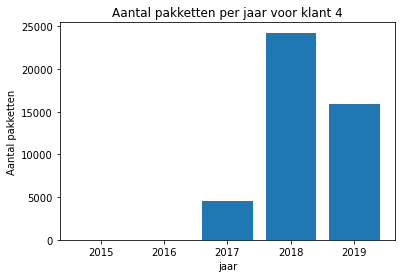

In [3]:
# Define X and Y, 2nd plot  (klant 2)
df_klant4 = new_df.where(new_df['cust_id'] == 'klant_4').dropna()
fig, ax = plt.subplots()
ax.bar(df_klant4['jaar'], df_klant4['totaal_aantal_pakketten'])
ax.set(
    xlabel='jaar',
    ylabel='Aantal pakketten',
    title='Aantal pakketten per jaar voor klant 4')
plt.show()